<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import cross_decomposition

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
cancer = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\breast-cancer-wisconsin-data.csv")

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [4]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [29]:
# Select Columns and store as arrays
X = cancer.iloc[:, 2:32].values
# y = cancer.iloc[:, 1].values

# Store arrays as dataframes - more flexible
X = pd.DataFrame.from_records(X)
y = cancer["diagnosis"]

# Change Begnin = 0 (False), Malignant = 1 (True)
y = y.replace({'B':0,'M':1})

In [30]:
# Set the Logistic Regression
logmodel = LogisticRegression()

In [31]:
# Partition the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# Fit training data
logmodel.fit(x_test,y_test)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# The Regression Coeficient from testing:
print("Regression Coefficient is ",logmodel.coef_)

Regression Coefficient is  [[-0.91724633  0.16176125 -0.46786837  0.00904304  0.04927684  0.16119652
   0.23156884  0.09771333  0.04893787  0.02015864  0.01544354 -0.46730968
  -0.07553837  0.12254687  0.00328779  0.02823698  0.03299258  0.0077175
   0.02280291  0.0042419  -0.57387501  0.19357551  0.27298948  0.02265784
   0.08361257  0.47298816  0.57347226  0.16253262  0.23168706  0.06687573]]


In [56]:
y_pred_class = logmodel.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105   3]
 [  4  59]]


In [58]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
 # The f1-score tells you the accuracy of the classifier in classifying the data points,
 # in that particular class compared to all other class. 
 # It is calculated by taking the harmonic mean of precision and recall. 
 # The support is the number of samples of the true response that lies in that class.

In [61]:
# Confirm the Model Accuracy from Classification Report
print(logmodel.score(x_test,y_test))

0.9590643274853801


#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [48]:
# predict test class:
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

# predicted test probability:
probability = logmodel.predict_proba(x_test)
print(probability)

[[9.02701137e-01 9.72988628e-02]
 [4.43663638e-01 5.56336362e-01]
 [9.99690629e-01 3.09370555e-04]
 [1.49727971e-03 9.98502720e-01]
 [4.84706195e-03 9.95152938e-01]
 [2.70522798e-04 9.99729477e-01]
 [2.69042044e-07 9.99999731e-01]
 [1.53771509e-03 9.98462285e-01]
 [9.90456809e-01 9.54319140e-03]
 [9.99075207e-01 9.24792726e-04]
 [9.96532045e-01 3.46795473e-03]
 [5.01785827e-02 9.49821417e-01]
 [4.60664730e-01 5.39335270e-01]
 [9.98938693e-01 1.06130730e-03]
 [5.33512503e-01 4.66487497e-01]
 [8.54264581e-01 1.45735419e-01]
 [9.91834244e-01 8.16575629e-03]
 [9.84715495e-01 1.52845045e-02]
 [9.99775487e-01 2.24513012e-04]
 [4.86919793e-09 9.99999995e-01]
 [9.98718613e-01 1.28138733e-03]
 [9.71501546e-01 2.84984544e-02]
 [5.31776905e-04 9.99468223e-01]
 [9.88582018e-01 1.14179817e-02]
 [2.88993188e-02 9.71100681e-01]
 [9.81967781e-01 1.80322189e-02]
 [9.92243393e-01 7.75660676e-03]
 [1.03253225e-08 9.99999990e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.48108481e-04 9.99851892e-01]
 [2.620126

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [51]:
# ANSWER
y_pred_class = logmodel.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105   3]
 [  4  59]]


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [12]:
# ANSWER
# use float to perform true division, not integer division

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [13]:
# ANSWER

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [14]:
# ANSWER

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [15]:
# ANSWER

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [16]:
# ANSWER

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [17]:
# ANSWER

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [18]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [19]:
from sklearn.metrics import roc_curve, auc

No handles with labels found to put in legend.


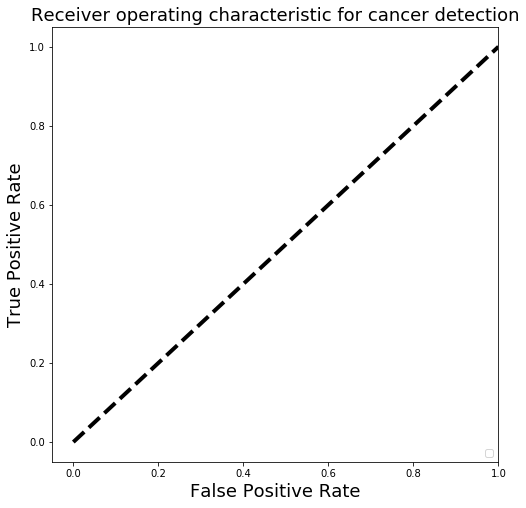

In [20]:
# For class 1, find the area under the curve
# Find fpr, tpr

# Find auc

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



